Taller 2 Métodos computacionales 2

Catalina Fuentes y Silvana Archila

1. Ciclo de actividad solar

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_21416\29091172.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('datos.dat', sep='\s+', names=['Year', 'Month', 'Day', 'SSN'],skiprows=1)


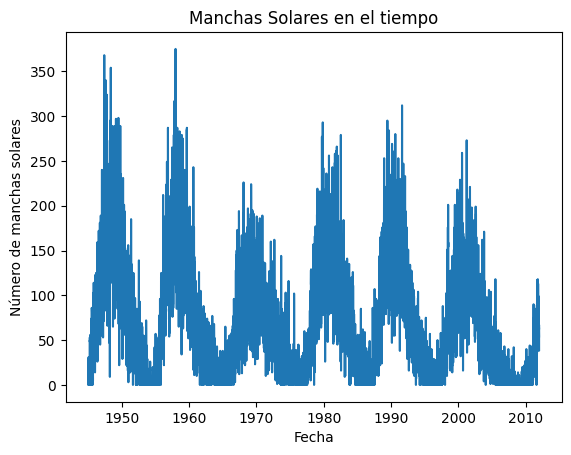

In [509]:
#Descarga de datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('datos.dat', sep='\s+', names=['Year', 'Month', 'Day', 'SSN'],skiprows=1)
df['fecha'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.set_index('fecha', inplace=True)
plt.plot(df['SSN'])
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Manchas Solares en el tiempo')
plt.show()

1.1. Periodo del ciclo solar

In [510]:
#Transformo las manchas y hallo la frecuencia principal
fft_manchas = np.fft.fft(df['SSN'])
frecuencias = np.fft.fftfreq(len(df), d=1)  

indice_fp = np.argmax(np.abs(fft_manchas[1:])) + 1  
fp = frecuencias[indice_fp]
periodo_dias = 1 / fp
periodo_anos = periodo_dias / 365 

print(f"La frecuencia principal de la señal es fp = {fp} (1/días)")
print(f"El período del ciclo solar es Pdías = {periodo_dias} días ó Paños = {periodo_anos:.2f} años.")

La frecuencia principal de la señal es fp = 0.0002451781627983001 (1/días)
El período del ciclo solar es Pdías = 4078.6666666666665 días ó Paños = 11.17 años.


1.2. Reducción de ruido: Filtro pasabajas

In [511]:
#Aplico filtro gaussiano
alfa = 1000
filtro = np.exp(-(frecuencias* alfa )**2)
fft_manchas_filtrada = filtro * fft_manchas

1.2.a

C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_21416\3212496048.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.abs(frecuencias[1:])), np.log10(np.abs(fft_manchas_filtrada[1:])), label='Transformada filtrada', linestyle='--')


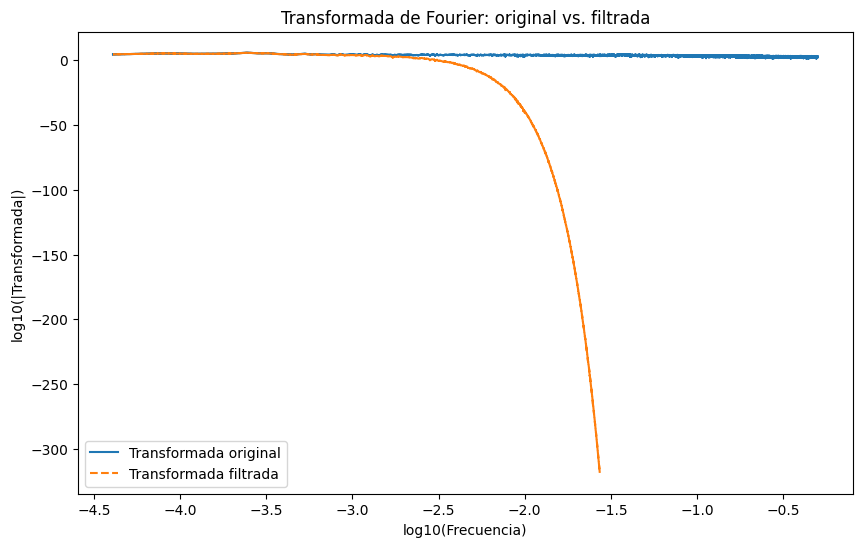

In [512]:
#Gráfica de t(log10 Transformada| vs log10|frecuencia| para la transformada original y filtrada
plt.figure(figsize=(10, 6))
plt.plot(np.log10(np.abs(frecuencias[1:])), np.log10(np.abs(fft_manchas[1:])), label='Transformada original')
plt.plot(np.log10(np.abs(frecuencias[1:])), np.log10(np.abs(fft_manchas_filtrada[1:])), label='Transformada filtrada', linestyle='--')
plt.xlabel('log10(Frecuencia)')
plt.ylabel('log10(|Transformada|)')
plt.legend()
plt.title('Transformada de Fourier: original vs. filtrada')
plt.show()

1.2.b

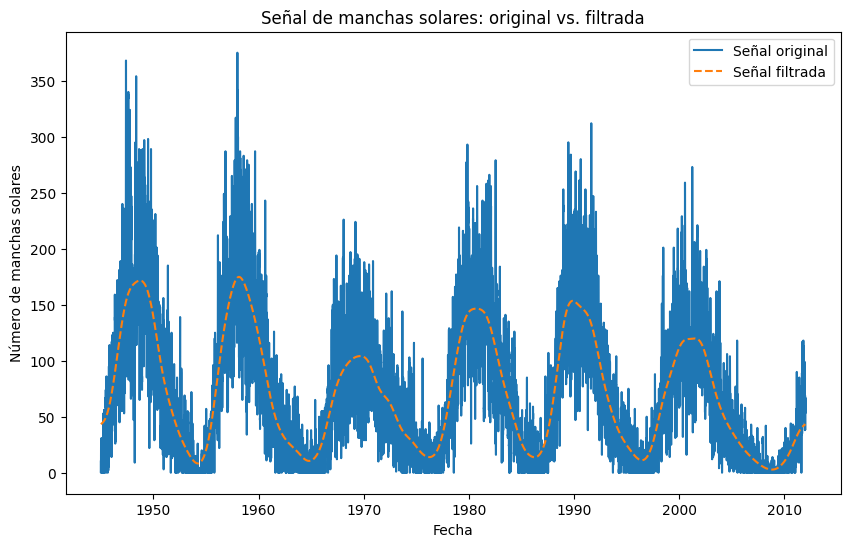

In [513]:
#Transformada inversa para recuperar la señal filtrada
manchas_filtrada = np.fft.ifft(fft_manchas_filtrada).real

#Graficar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['SSN'], label='Señal original')
plt.plot(df.index, manchas_filtrada, label='Señal filtrada', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.legend()
plt.title('Señal de manchas solares: original vs. filtrada')
plt.show()

1.3. Extrapolación de funciones periódicas

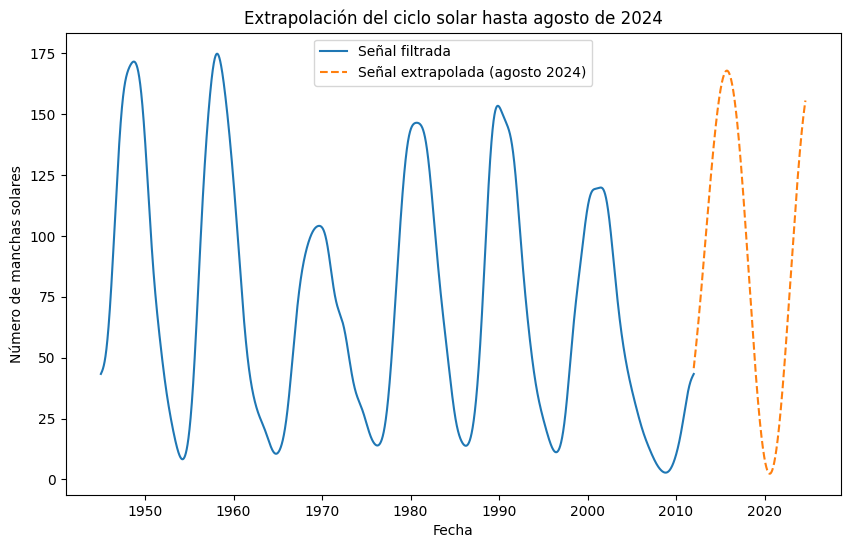

En agosto de 2024 estamos en la fase ascendente del ciclo solar.
Para la mitad de agosto de 2024 deberíamos esperar aproximadamente 155.62 manchas solares.


In [514]:
#Parámetros de la extrapolación
n = 10  
fecha_final = pd.Timestamp('2024-08-15') 
N = len(df) 

#Transformada de Fourier de la señal filtrada
fft_manchas = np.fft.fft(manchas_filtrada)
frecuencias = np.fft.fftfreq(N, d=1)

#Selección de los primeros y últimos n armónicos
harmonicos_indices = np.concatenate([np.arange(n), np.arange(-n, 0)])
harmonicos_frecuencias = frecuencias[harmonicos_indices]
harmonicos_Fk = fft_manchas[harmonicos_indices]

#Crear un array de tiempos para extrapolar la señal (desde la última fecha hasta 2024)
dias_extrapolacion = pd.date_range(start=df.index[-1], end=fecha_final, freq='D')
t_extrapolacion = np.arange(len(dias_extrapolacion)) + N  

#Calcular la señal extrapolada
y_extrapolada = np.zeros(len(t_extrapolacion), dtype=complex)

for k in range(2*n):
    y_extrapolada += harmonicos_Fk[k] * np.exp(2j * np.pi * harmonicos_frecuencias[k] * t_extrapolacion)

y_extrapolada /= N  

#Graficar la señal original y la extrapolada
plt.figure(figsize=(10, 6))
plt.plot(df.index, manchas_filtrada, label='Señal filtrada')
plt.plot(dias_extrapolacion, y_extrapolada.real, label='Señal extrapolada (agosto 2024)', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.legend()
plt.title('Extrapolación del ciclo solar hasta agosto de 2024')
plt.show()

#Respuesta a las preguntas:
print("En agosto de 2024 estamos en la fase ascendente del ciclo solar.")
print(f"Para la mitad de agosto de 2024 deberíamos esperar aproximadamente {round(y_extrapolada.real[-1], 3)} manchas solares.")

2. Transformada 2D

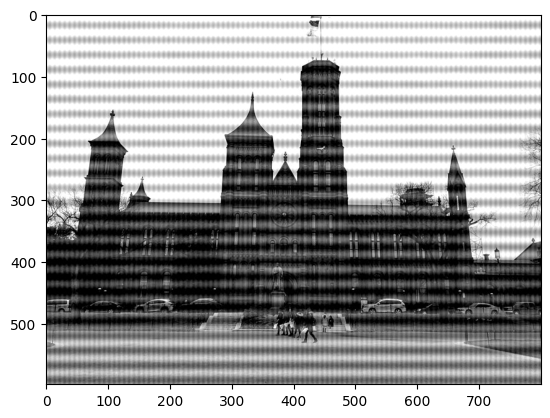

In [515]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = np.array(Image.open("imagen.jpg")).astype(float)
plt.imshow(img, cmap='gray')

2.1

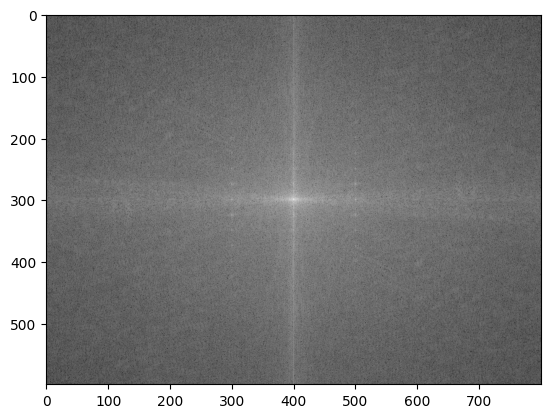

In [516]:
# Calcula la transformada de Fourier
fourier_img = np.fft.fft2(img)

# Centra el componente de frecuencia cero
fourier_img_shifted = np.fft.fftshift(fourier_img)

# Grafica la transformada de Fourier con escala logarítmica
plt.imshow(np.log10(np.abs(fourier_img_shifted)), cmap='gray')

2.2

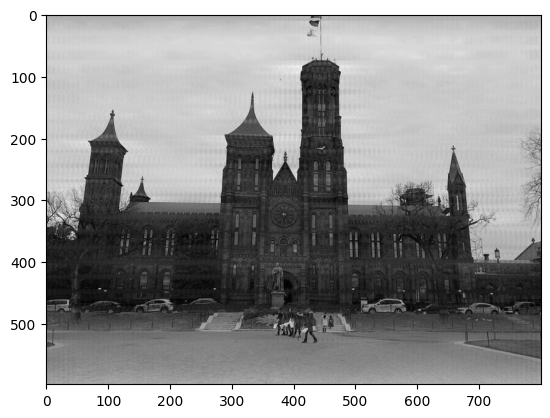

In [517]:
#Borro las 2 líneas externas
posiciones_i = [300,500]  
for i in posiciones_i:
    for j in range(0, 598):
      fourier_img_shifted[j:j+10, i:i+5] = 0
      
#Borro la línea interna excepto el centro
posiciones_i = [400]  
for i in posiciones_i:
    for j in range(0, 285):
      fourier_img_shifted[j:j+10, i:i+5] = 0
    for j in range(305, 598):
      fourier_img_shifted[j:j+10, i:i+5] = 0
      
#Borro línea horizontal NO SIRVE, TOCA?
#posiciones_j = [300]  
#for j in posiciones_j:
    #for i in range(0, 380):
    #  fourier_img_shifted[j:j+1, i:i+10] = 0
    #for i in range(420, 800):
      #fourier_img_shifted[j:j+1, i:i+10] = 0

filtered_img = np.fft.ifft2(np.fft.ifftshift(fourier_img_shifted))

# Grafica la imagen filtrada
plt.imshow(np.abs(filtered_img), cmap='gray')

C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_21416\3442717258.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(fourier_img_shifted)), cmap='gray')


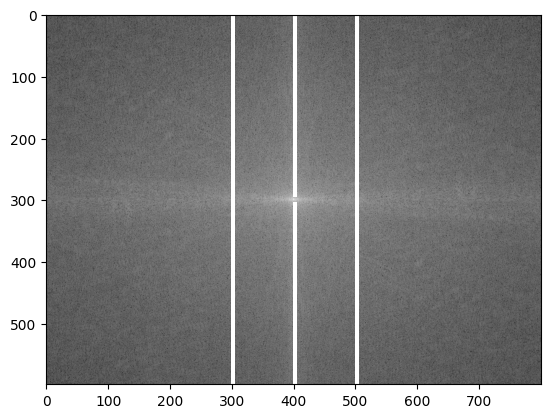

In [518]:
plt.imshow(np.log10(np.abs(fourier_img_shifted)), cmap='gray')